In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from learning_algorithm.data.data_load import load_mnist
from learning_algorithm.algo.multi_layer_perceptron import NeuralNetMLP

In [2]:
path = './data/minist/hand_written_digits'
X_train_images, y_train_labels = load_mnist(path, kind='train')

In [3]:
print(f'Rows: {X_train_images.shape[0]}, columns: {X_train_images.shape[1]}')

Rows: 60000, columns: 784


In [4]:
X_test_images, y_test_labels = load_mnist(path, kind='t10k')

In [5]:
print(f'Rows: {X_test_images.shape[0]}, columns: {X_test_images.shape[1]}')

Rows: 10000, columns: 784


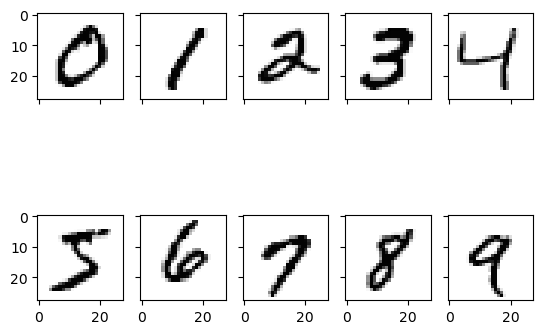

In [6]:
fig, ax = plt.subplots(nrows=2, 
                       ncols=5,
                       sharex=True,
                       sharey=True)
ax = ax.flatten()

for i in range(10):
    img = X_train_images[y_train_labels == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

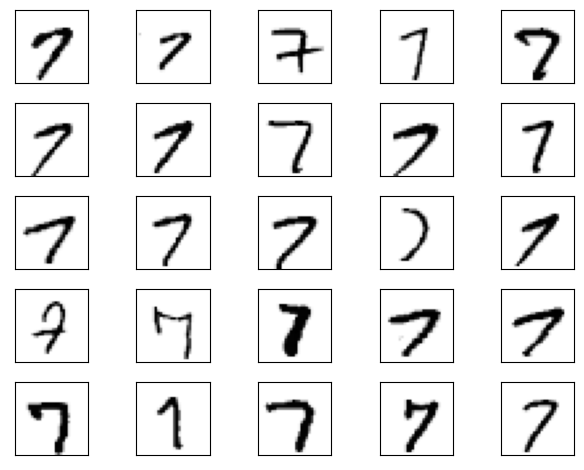

In [7]:
fig, ax = plt.subplots(nrows=5,
                       ncols=5,
                       sharex=True,
                       sharey=True)
ax = ax.flatten()

for i in range(25):
    img = X_train_images[y_train_labels == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [8]:
mnist_path = os.path.join(path, 'minist_scaled.npz')

np.savez_compressed(mnist_path,
                    X_train=X_train_images,
                    y_train=y_train_labels,
                    X_test=X_test_images,
                    y_test=y_test_labels)

In [9]:
mnist = np.load(mnist_path)

In [10]:
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [11]:
X_train, y_train, X_test, y_test = [mnist[file] for file in mnist.files]

In [12]:
# l2: This is the Implementing a multilayer perceptron parameter for L2 regularization to decrease the degree of overfitting.
# epochs: This is the number of passes over the training set.
# eta: This is the learning rate Implementing a multilayer perceptron.
# shuffle: This is for shuffling the training set prior to every epoch to prevent that the algorithm gets stuck in circles.
# seed: This is a random seed for shuffling and weight initialization.
# minibatch_size: This is the number of training samples in each mini-batch when splitting of the training data in each epoch for stochastic gradient descent. The gradient is computed for each mini-batch separately instead of the entire training data for faster learning.
nn = NeuralNetMLP(n_hidden=100,
                  l2=0.01,
                  epochs=200,
                  eta=0.0005,
                  minibatch_size=100,
                  shuffle=True,
                  seed=1)

In [13]:
# In general, training (deep) neural networks is relatively expensive compared with the 
# other models we discussed so far. Thus, we want to stop it early in certain 
# circumstances and start over with different hyperparameter settings. 
# Alternatively, if we find that it increasingly tends to overfit the 
# training data (noticeable by an increasing gap between training 
# and validation set performance), we may want to stop the training early as well.
nn.fit(X_train=X_train[:55000],
       y_train=y_train[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train[55000:])

200/200 | Cost: 5065.78 | Train/Valid Acc.: 99.28%/97.98%  

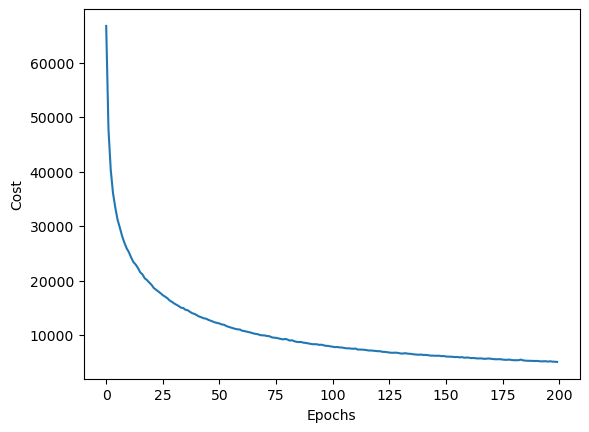

In [15]:
# Plots the cost over the 200 epochs
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

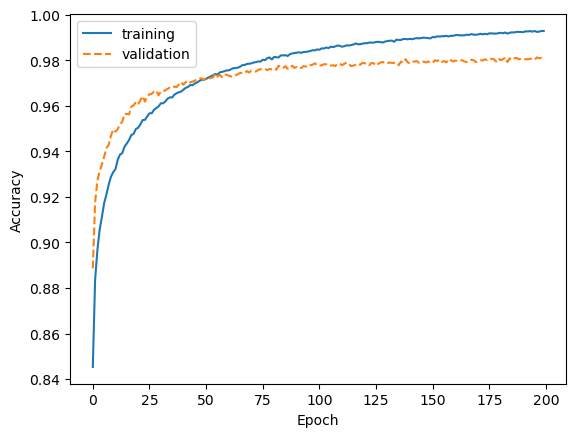

In [17]:
# Plot those accuracy values over the 200 training epochs
# The plot reveals that the gap between training and validation accuracy 
# increases the more epochs we train the network. At approximately the 50th epoch, 
# the training and validation accuracy values are equal, and then, the network 
# starts overfitting the training data.
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label='training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label='validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
# Evaluate the generalization performance of the model by calculating 
# the prediction accuracy on the test set
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(np.float) / X_test.shape[0])
print(f'Training accuracy: {round(acc * 100, 2)}%')

Training accuracy: 97.54%


/var/folders/3n/7kvkbqjd0l9grdj7kptkcfgr0000gn/T/ipykernel_6721/3569432285.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc = (np.sum(y_test == y_test_pred).astype(np.float) / X_test.shape[0])


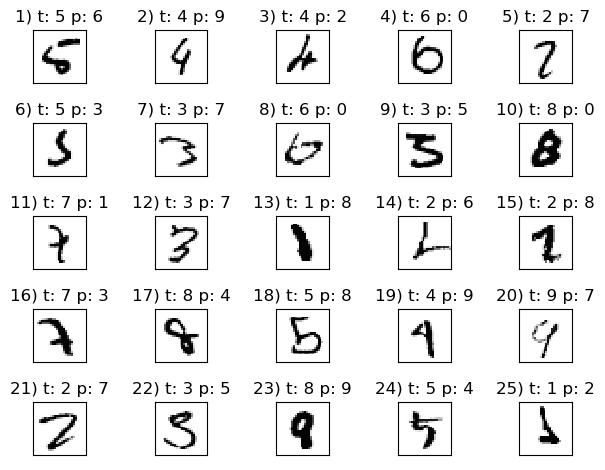

In [25]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab= y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5,
                       ncols=5,
                       sharex=True,
                       sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img,
                 cmap='Greys',
                 interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()